We will solve a heat equation:
$$
\frac{\partial u}{\partial t}=\alpha \frac{\partial^2 u}{\partial x^2}, \quad x \in[0,1], \quad t \in[0,1]
$$
where $\alpha=0.4$ is the thermal diffusivity constant.

With Dirichlet boundary conditions:
$$
u(0, t)=u(1, t)=0,
$$
and periodic(sinusoidal) inital condition:
$$
u(x, 0)=\sin \left(\frac{n \pi x}{L}\right), \quad 0<x<L, \quad n=1,2, \ldots \ldots
$$
where $L=1$ is the length of the bar, $n=1$ is the frequency of the sinusoidal initial conditions.

In [2]:
# Import NumPy for numerical operations
import numpy as np

# Import PyTorch for building and training neural networks
import torch
import torch.nn as nn
import torch.optim as optim

# Import Matplotlib for plotting
import matplotlib.pyplot as plt


# Import the time module to time our training process
import time

# Ignore Warning Messages
import warnings
warnings.filterwarnings("ignore")

The exact solution is

$$u(x, t)=e^{\frac{-n^2 \pi^2 \alpha t}{L^2}} \sin \left(\frac{n \pi x}{L}\right)$$

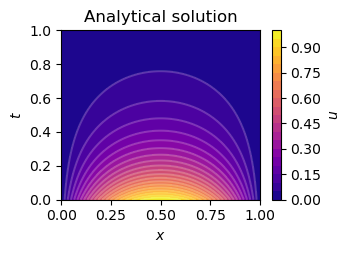

In [9]:
def analytic_sol_func(x, t, n, L, alpha):
    exponent = (-n**2 * np.pi**2 * alpha * t) / L**2
    sine_term = np.sin(n * np.pi * x / L)
    return np.exp(exponent) * sine_term

# Ejemplo de uso:

n = 1
L = 1.0
alpha = 0.4
a = 0.4
 
# Generate training data in NumPy
x_np = np.linspace(0, 1, 100)  # x data (numpy array), shape=(100,)
t_np = np.linspace(0, 1, 100)  # t data (numpy array), shape=(100,)

# Create a grid of x and t values
x_grid, t_grid = np.meshgrid(x_np, t_np) # x and t data (numpy array), shape=(100, 100)

# Calculate u values using the analytical solution function
u_grid = analytic_sol_func(t_grid,x_grid, n, L, alpha) # u data (numpy array), shape=(100, 100)

# Create a figure for the plot
fig = plt.figure(figsize=(3.2, 2.2))

# Plot the u values as a function of t and x
plt.contourf(t_grid,x_grid,u_grid, origin='lower', extent=(0, 1, 0, 1), levels=20,cmap='plasma')
plt.colorbar(label='$u$')
plt.contour(t_grid, x_grid, u_grid, levels=20, colors='white', alpha=0.2, linestyles='solid')
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.title('Analytical solution')

# Display the plot
plt.show()

In [10]:
# Definir la red neuronal
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.fc1 = nn.Linear(2, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 1)
        
    def forward(self, x, t):
        input_data = torch.cat([x, t], dim=1)
        out = torch.relu(self.fc1(input_data))
        out = torch.relu(self.fc2(out))
        out = self.fc3(out)
        return out

# Definir la función de pérdida
def loss_function(u_pred, x, t):
    # Calcular derivadas
    u_x = torch.autograd.grad(u_pred, x, torch.ones_like(u_pred), create_graph=True)[0]
    u_xx = torch.autograd.grad(u_x, x, torch.ones_like(u_x), create_graph=True)[0]
    u_t = torch.autograd.grad(u_pred, t, torch.ones_like(u_pred), create_graph=True)[0]
    # Definir la ecuación diferencial
    eq_residual = u_t - 0.4 * u_xx
    # Calcular la pérdida
    loss = torch.mean(eq_residual**2)
    return loss

In [12]:
# Inicializar la red neuronal
pinn = PINN()

# Definir el optimizador
optimizer = optim.Adam(pinn.parameters(), lr=0.001)

# Generar datos de entrenamiento en PyTorch
x = torch.tensor(np.linspace(0, 1, 100), dtype=torch.float32).view(-1, 1)
t = torch.tensor(np.linspace(0, 1, 100), dtype=torch.float32).view(-1, 1)
x_grid, t_grid = torch.meshgrid(x, t)

# Entrenamiento
epochs = 10000
for epoch in range(epochs):
    optimizer.zero_grad()
    u_pred = pinn(x_grid, t_grid)
    loss = loss_function(u_pred, x_grid, t_grid)
    loss.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Plotear la solución aproximada
u_pred = pinn(x_grid, t_grid).detach().numpy()
plt.contourf(t_grid.numpy(), x_grid.numpy(), u_pred, origin='lower', extent=(0, 1, 0, 1), levels=20, cmap='plasma')
plt.colorbar(label='$u$')
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.title('Approximated solution')
plt.show()

RuntimeError: torch.meshgrid: Expected 0D or 1D tensor in the tensor list but got:  0.0000
 0.0101
 0.0202
 0.0303
 0.0404
 0.0505
 0.0606
 0.0707
 0.0808
 0.0909
 0.1010
 0.1111
 0.1212
 0.1313
 0.1414
 0.1515
 0.1616
 0.1717
 0.1818
 0.1919
 0.2020
 0.2121
 0.2222
 0.2323
 0.2424
 0.2525
 0.2626
 0.2727
 0.2828
 0.2929
 0.3030
 0.3131
 0.3232
 0.3333
 0.3434
 0.3535
 0.3636
 0.3737
 0.3838
 0.3939
 0.4040
 0.4141
 0.4242
 0.4343
 0.4444
 0.4545
 0.4646
 0.4747
 0.4848
 0.4949
 0.5051
 0.5152
 0.5253
 0.5354
 0.5455
 0.5556
 0.5657
 0.5758
 0.5859
 0.5960
 0.6061
 0.6162
 0.6263
 0.6364
 0.6465
 0.6566
 0.6667
 0.6768
 0.6869
 0.6970
 0.7071
 0.7172
 0.7273
 0.7374
 0.7475
 0.7576
 0.7677
 0.7778
 0.7879
 0.7980
 0.8081
 0.8182
 0.8283
 0.8384
 0.8485
 0.8586
 0.8687
 0.8788
 0.8889
 0.8990
 0.9091
 0.9192
 0.9293
 0.9394
 0.9495
 0.9596
 0.9697
 0.9798
 0.9899
 1.0000
[ torch.FloatTensor{100,1} ]